In [1]:
using DataFrames
using DataStructures
using Plots
using Distributions
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

In [2]:
n=2
p=0.5
binom=Binomial(n, p)

Binomial{Float64}(n=2, p=0.5)

In [3]:
k_probs=[Distributions.pdf(binom, x) for x in 0:2]

3-element Vector{Float64}:
 0.24999999999999994
 0.49999999999999994
 0.24999999999999994

In [4]:
pmf_k=pmf_from_seq(0:2, k_probs)

3×2 DataFrame
 Row │ a      b       
     │ Int64  Float64 
─────┼────────────────
   1 │     0     0.25
   2 │     1     0.5
   3 │     2     0.25

In [5]:
function make_binomial(n, p)
    """Make a binomial Pmf."""
    binom=Binomial(n, p)
    ks=[pdf(binom, x) for x in 0:n]
    pmf_from_seq(0:n, ks)
end

make_binomial (generic function with 1 method)

In [6]:
pmf_k=make_binomial(250, 0.5);

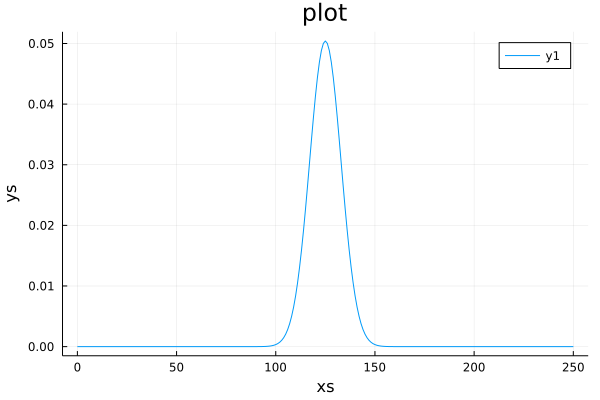

In [7]:
plot(pmf_k)

In [8]:
max_prob(pmf_k)

125

In [9]:
pmf_k[125]

0.05041221314731098

In [10]:
pmf_k[140]

0.00835718172491837

In [11]:
prob_ge(pmf_k, 140)

0.033210575620021734

In [12]:
prob_le(pmf_k, 110)

0.033210575620021734

In [13]:
hypos=range(0, 1, length=101)
prior=pmf_from_seq(hypos);

In [14]:
likelihood_heads=hypos
likelihood_tails=1 .-hypos
likelihood=Dict([('H', likelihood_heads), ('T', likelihood_tails)])

Dict{Char, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}} with 2 entries:
  'H' => 0.0:0.01:1.0
  'T' => 1.0:-0.01:0.0

In [15]:
dataset=vcat(fill('H', 140), fill('T', 110));

In [16]:
function update_euro(pmf, dataset)
    for d in dataset
        pmf *= likelihood[d]
    end
    pmf
end

update_euro (generic function with 1 method)

In [17]:
posterior=update_euro(prior, dataset);

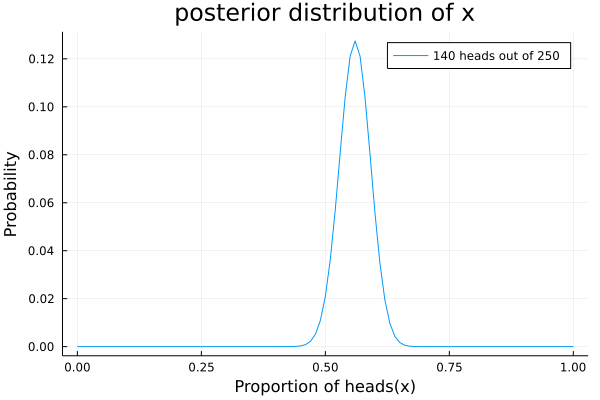

In [18]:
plot(posterior, 
    xaxis=("Proportion of heads(x)"), 
    yaxis=("Probability"), 
    label="140 heads out of 250", 
    plot_title="posterior distribution of x")

In [19]:
max_prob(posterior)

0.56

In [20]:
uniform=pmf_from_seq(hypos)
a=vcat(1:50, 51:-1:1)
triangle=pmf_from_seq(hypos, counts=a);

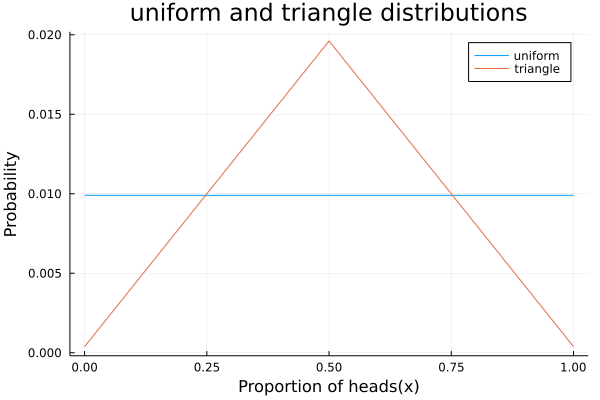

In [21]:
plot(uniform, xaxis=("Proportion of heads(x)"), yaxis=("Probability"), label="uniform", plot_title="uniform and triangle distributions")
plot!(triangle, label="triangle")

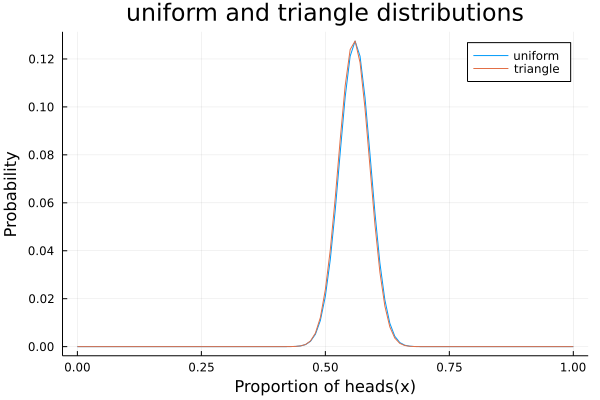

In [22]:
uniform_p=update_euro(uniform, dataset)
triangle_p=update_euro(triangle, dataset)
plot(uniform_p, xaxis=("Proportion of heads(x)"), yaxis=("Probability"), label="uniform", plot_title="uniform and triangle distributions")
plot!(triangle_p, label="triangle")

In [23]:
function update_binomial(pmf, data)
    (k, n) = data
    xs = values(pmf)
    likelihood=binom_pmf(k, n, xs)
    pmf*=likelihood
end


update_binomial (generic function with 1 method)

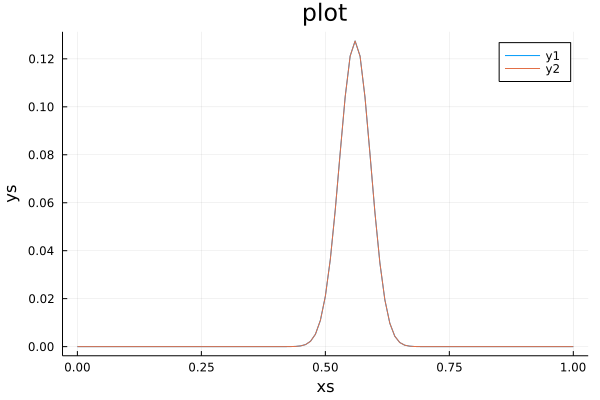

In [25]:
uniform2=pmf_from_seq(hypos)
data=(140, 250)
uniform2=update_binomial(uniform2, data)
plot(uniform2)
plot!(uniform_p)

__Exercises__

_exercise 4.1_

In [55]:
hypos=range(0.1, 0.4, length=101)
prior=pmf_from_seq(hypos);

In [56]:
likelihood_hit=hypos
likelihood_out=1 .-hypos
likelihood=Dict([('Y', likelihood_hit), ('N', likelihood_out)])

Dict{Char, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}} with 2 entries:
  'Y' => 0.1:0.003:0.4
  'N' => 0.9:-0.003:0.6

In [57]:
dataset=vcat(fill('Y', 25), fill('N', 75));

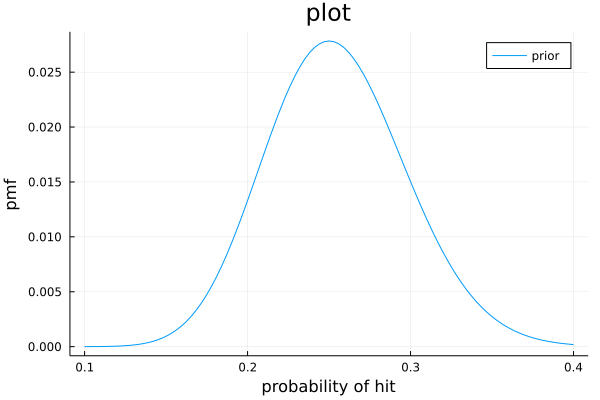

In [58]:
for data in dataset
    prior *= likelihood[data]
end
plot(prior, xaxis=("probability of hit"), yaxis=("pmf"), label="prior")

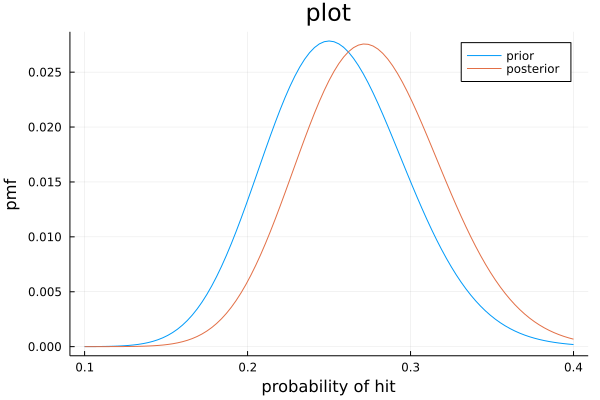

In [59]:
posterior=copy(prior)
for d in "YYY"
    posterior *= likelihood[d]
end
plot!(posterior, label="posterior")

In [60]:
max_prob(prior)

0.25

In [61]:
max_prob(posterior)

0.271

_exercise 4.2_

In [72]:
hypos=range(0, 1, length=101)
prior=pmf_from_seq(hypos);

In [76]:
likelihood=Dict([('Y', 0.5 .+hypos./2), ('N', (1 .-hypos) ./2)])

Dict{Char, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}} with 2 entries:
  'Y' => 0.5:0.005:1.0
  'N' => 0.5:-0.005:1.0408340855861237e-17

In [77]:
dataset=vcat(fill('Y', 80), fill('N', 20));

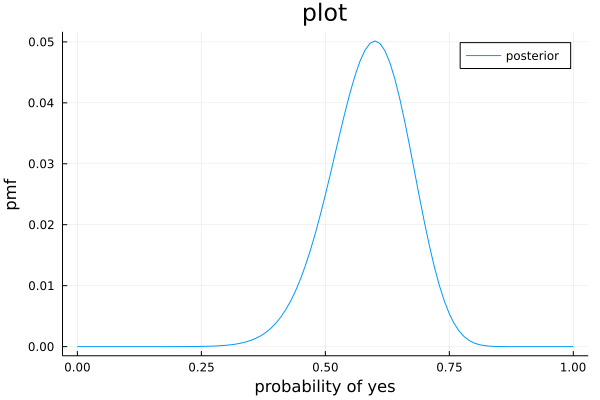

In [78]:
posterior=copy(prior)
for d in dataset
    posterior *= likelihood[d]
end
plot(posterior, xaxis=("probability of yes"), yaxis=("pmf"), label="posterior")

In [79]:
max_prob(posterior)

0.6

_exercise 4.3_

In [113]:
hypos=range(0, 1, length=101)
prior=pmf_from_seq(hypos)
likelihood=Dict([('H', hypos), ('T', 1 .-hypos)])

Dict{Char, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}} with 2 entries:
  'H' => 0.0:0.01:1.0
  'T' => 1.0:-0.01:0.0

In [114]:
dataset=vcat(fill('H', 140), fill('T', 110));

In [120]:
function update(prior, not_accurate)
    accurate=1-not_accurate
    posterior=copy(prior)
    for d in dataset
        if d == 'H'
            not_d = 'T'
        else
            not_d = 'H'
        end
        posterior *= (accurate .* likelihood[d]).+(not_accurate .* likelihood[not_d])
    end
    posterior
end

update (generic function with 1 method)

In [116]:
p0 = update(prior, 0)
max_prob(p0)

0.56

In [117]:
p2=update(prior, 0.2)
max_prob(p2)

0.6

In [118]:
p4=update(prior, 0.4)
max_prob(p4)

0.8

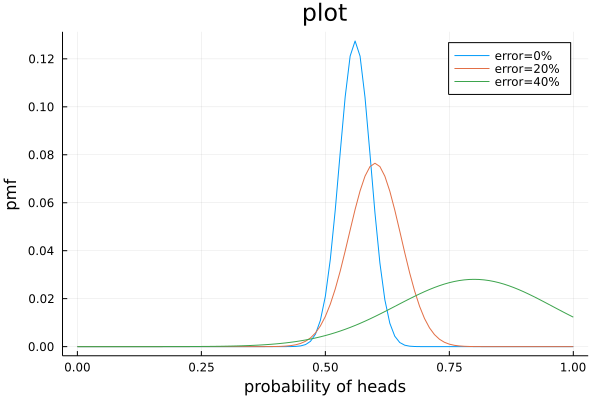

In [119]:
plot(p0, xaxis=("probability of heads"), yaxis=("pmf"), label="error=0%")
plot!(p2, label="error=20%")
plot!(p4, label="error=40%")

_exercise 4.4_

In [123]:
hypos=range(0.1, 0.4, length=101)
prior=pmf_from_seq(hypos);

In [138]:
n=2
x=hypos
likes=[binom_pmf(k, n, x).^2 for k in 0:n+1]
likelihood=sum(likes);

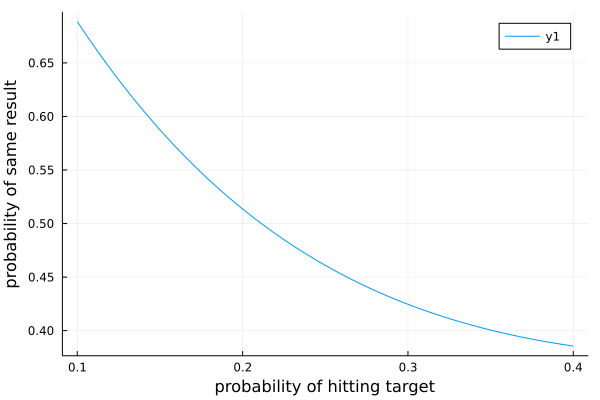

In [140]:
plot(x, likelihood, xaxis=("probability of hitting target"), yaxis=("probability of same result"))

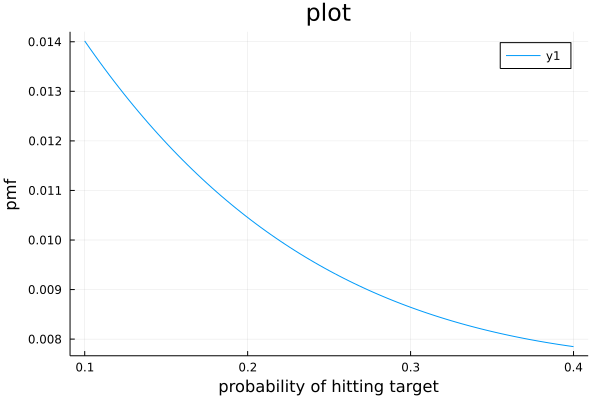

In [141]:
posterior = prior * likelihood
plot(posterior, xaxis=("probability of hitting target"), yaxis=("pmf"))